In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.api import add_constant
import math 
import scipy.stats as sp
from scipy.stats.stats import pearsonr
import pandas as pd

In [4]:
dataset = pd.read_csv('diamonds.csv')


#On this particular notebook we will try to figure out if there is a relation between the price and the volume of the diamonds. For that we need to assign a new column for the volume

In [5]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
dataset['volume']= dataset['x']*dataset['y']*dataset['z']


In [7]:
dataset


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [8]:
Y = dataset['price']
X=dataset['volume']

In [9]:
def scatter_plot(X,Y):
    s= plt.plot(X,Y,'bp')
    return plt.grid()

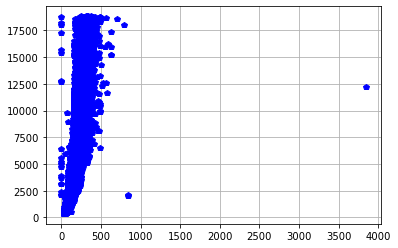

In [10]:
scatter_plot(X,Y)

In [12]:
Xb = add_constant(X)
regression_formula = sm.OLS(Y,Xb)
model = regression_formula.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 2.365e+05
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:19:50   Log-Likelihood:            -4.7837e+05
No. Observations:               53940   AIC:                         9.567e+05
Df Residuals:                   53938   BIC:                         9.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2041.4788     14.342   -142.340      0.000   -2069.590   -2013.368
volume        46.0093      0.095    486.329      0.000      45.824      46.195
==============================================================================
Omnibus:                   106601.519   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4992582236.742
Skew:                         -14.749   Prob(JB):                         0.00
Kurtosis:                    1493.142   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
Y_hat = model.predict(Xb)

In [16]:
Y_hat

0        -283.830617
1        -453.888949
2        -289.588450
3         108.285835
4         347.196881
            ...     
53935    3291.917800
53936    3392.686192
53937    3224.271633
53938    4435.070076
53939    3689.826546
Length: 53940, dtype: float64

In [25]:
def fitted_value_plot(X,Y):
    s =plt.plot(X,Y,'bp')
    v_fit = model.predict(X) #change the preceeding variable name.
    X=X.values
    v_fit = v_fit.values
    rng1,rng2 = [np.min(X),np.max(X)],[np.min(v_fit),np.max(v_fit)]
    fit_line = plt.plot([int(rng1[0]),int(rng1[1])],[int(rng2[0]),int(rng2[1])],'--',linewidth=2)
    return plt.grid()

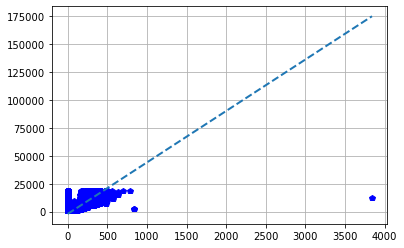

In [26]:
fitted_value_plot(Xb,Y)

# The plot above looks a bit disorted - hence we will try another way to fit the line which will give us a better view of the scenerio. 


In [33]:
def regression_line(X,Y):
    a, b = np.polyfit(X, Y, 1)
    plt.scatter(X,Y, color='purple')
    plt.plot(X, a*X+b) 
    return plt.grid()

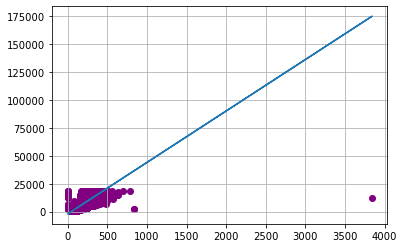

In [34]:
regression_line(X,Y)

#Another method to fit the line 

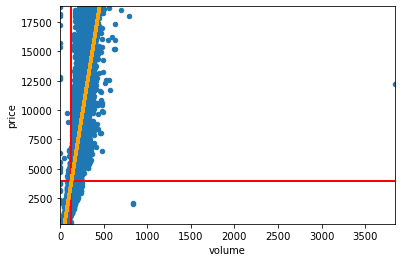

In [36]:
x_range = [dataset['volume'].min(),dataset['volume'].max()]
y_range = [dataset['price'].min(),dataset['price'].max()]
scatterPlot = dataset.plot(kind = 'scatter', x = 'volume', y = 'price',xlim = x_range, ylim=y_range)
meanX = scatterPlot.plot([dataset['volume'].mean(),dataset['volume'].mean()],y_range,color ='red',linewidth =2)
meanY =scatterPlot.plot(x_range,[dataset['price'].mean(),dataset['price'].mean()],color='red',linewidth =2)
regression_line = scatterPlot.plot(dataset['volume'],Y_hat,'-',color = 'orange',linewidth =3)

In [37]:
#let's extract the betas 
betas = model.params


In [38]:
betas


const    -2041.478795
volume      46.009287
dtype: float64